## Data Preprocessing

In [1]:
# import required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sys,os
sys.path.append(os.path.abspath(os.path.join('../scripts')))

from preprocessing import Preprocessing
from plot import Plot

import io

import warnings
warnings.filterwarnings('ignore')
import dvc.api

In [2]:
# instantiate Preprocessing object
preprocess = Preprocessing()

# instantiate Plot object
plot = Plot()

In [3]:
# import dvc.api
# # load the dataset
# path = '../data/train.csv'
# repo = 'https://github.com/YohansSamuel/pharmaceutical_sales_prediction'
# rev ='v1'
# data = dvc.api.read(path=path,repo=repo)
# df = pd.read_csv(io.StringIO(data),low_memory=False)

train_df = preprocess.read_csv('../data/train.csv')
store_df = preprocess.read_csv('../data/store.csv')
test_df = preprocess.read_csv('../data/test.csv')

file read as csv
file read as csv
file read as csv


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [7]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [10]:
train_df.shape

(1017209, 9)

In [11]:
store_df.shape

(1115, 10)

In [12]:
test_df.shape

(41088, 8)

In [13]:
# join the store dataframe with the train dataframe
joined_train_df = pd.merge(train_df, store_df, how = 'left', on = 'Store')
joined_test_df = pd.merge(test_df, store_df, how = 'left', on = 'Store')

In [14]:
# Change the date column to datetime
joined_train_df = preprocess.convert_to_datetime(joined_train_df, 'Date')
joined_test_df = preprocess.convert_to_datetime(joined_test_df, 'Date')

In [15]:
# Extract columns from the date column
joined_train_df = preprocess.extract_fields_date(joined_train_df, 'Date')
joined_test_df = preprocess.extract_fields_date(joined_test_df, 'Date')

In [16]:
# diplay information of joined train dataframe
preprocess.get_info(joined_train_df)

Number of rows: 1017209
Number of columns: 24
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object     

((1017209, 24), None)

In [17]:
# diplay information of joined test dataframe
preprocess.get_info(joined_test_df)

Number of rows: 41088
Number of columns: 23
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMon

((41088, 23), None)

In [18]:
# count values
preprocess.get_count(joined_train_df,"PromoInterval")

,PromoInterval
"Jan,Apr,Jul,Oct",293122
"Feb,May,Aug,Nov",118596
"Mar,Jun,Sept,Dec",97460


In [19]:
preprocess.get_count(joined_train_df,"StateHoliday")

,StateHoliday
0,855087
0,131072
a,20260
b,6690
c,4100


In [20]:
# count values
preprocess.get_count(joined_test_df,"PromoInterval")

,PromoInterval
"Jan,Apr,Jul,Oct",13776
"Feb,May,Aug,Nov",5712
"Mar,Jun,Sept,Dec",4368


In [21]:
#Total missing data in percentage
preprocess.percent_missing(joined_train_df)

8.9

In [22]:
# Missing data in the train data in percentage
preprocess.get_missing_data_percentage(joined_train_df)

,Total,%
PromoInterval,508031,49.9
Promo2SinceYear,508031,49.9
Promo2SinceWeek,508031,49.9
CompetitionOpenSinceMonth,323348,31.8
CompetitionOpenSinceYear,323348,31.8
CompetitionDistance,2642,0.3
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0


In [23]:
# Missing data in the test data in percentage
preprocess.get_missing_data_percentage(joined_test_df)

,Total,%
PromoInterval,17232,41.9
Promo2SinceYear,17232,41.9
Promo2SinceWeek,17232,41.9
CompetitionOpenSinceMonth,15216,37.0
CompetitionOpenSinceYear,15216,37.0
CompetitionDistance,96,0.2
Open,11,0.0
Promo2,0,0.0
weekofyear,0,0.0
weekday,0,0.0


#### we have a lot of missing values, therefore we need to handle those missing values accordingly


In [24]:
missing_df = joined_train_df[['PromoInterval', 'Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance', 'Open']]
missing_df.head(10)

,PromoInterval,Promo2SinceYear,Promo2SinceWeek,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionDistance,Open
0,NaN,NaN,NaN,9.0,2008.0,1270.0,1
1,"Jan,Apr,Jul,Oct",2010.0,13.0,11.0,2007.0,570.0,1
2,"Jan,Apr,Jul,Oct",2011.0,14.0,12.0,2006.0,14130.0,1
3,NaN,NaN,NaN,9.0,2009.0,620.0,1
4,NaN,NaN,NaN,4.0,2015.0,29910.0,1
5,NaN,NaN,NaN,12.0,2013.0,310.0,1
6,NaN,NaN,NaN,4.0,2013.0,24000.0,1
7,NaN,NaN,NaN,10.0,2014.0,7520.0,1
8,NaN,NaN,NaN,8.0,2000.0,2030.0,1
9,NaN,NaN,NaN,9.0,2009.0,3160.0,1


In [25]:


miss_1 = ['Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance']
joined_train_df = preprocess.fill_missing_median(joined_train_df, miss_1)
joined_test_df = preprocess.fill_missing_median(joined_test_df, miss_1)

In [26]:

joined_train_df = preprocess.fill_missing_mode(joined_train_df, ['PromoInterval'])
joined_test_df = preprocess.fill_missing_mode(joined_test_df, ['PromoInterval'])

In [27]:

# fill the values of 'open' in joined test data with the value of '0'
joined_test_df = preprocess.fill_missing_with_zero(joined_test_df, ['Open'])

In [28]:
# Missing data in the train data in percentage
preprocess.get_missing_data_percentage(joined_train_df)

,Total,%
Store,0,0.0
DayOfWeek,0,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0
Year,0,0.0
PromoInterval,0,0.0
Promo2SinceYear,0,0.0
Promo2SinceWeek,0,0.0


In [29]:
# Missing data in the test data in percentage
preprocess.get_missing_data_percentage(joined_test_df)

,Total,%
Id,0,0.0
CompetitionOpenSinceYear,0,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0
Year,0,0.0
PromoInterval,0,0.0
Promo2SinceYear,0,0.0
Promo2SinceWeek,0,0.0


### Check for outliers and handling them

In [30]:
joined_train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day', 'weekday',
       'weekofyear', 'weekend'],
      dtype='object')

In [31]:
columns = ['Sales', 'Customers']
preprocess.getOverview(joined_train_df[columns])

,number_of_outliers,percentage_of_outliers,skew,Q1,Median,Q3
label,,,,,,
Sales,26694,2.62%,0.64146,3727.0,5744.0,7856.0
Customers,38095,3.75%,1.59865,405.0,609.0,837.0


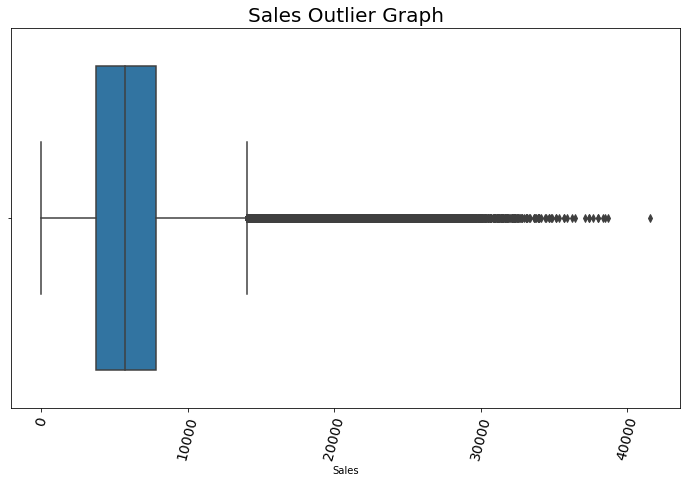

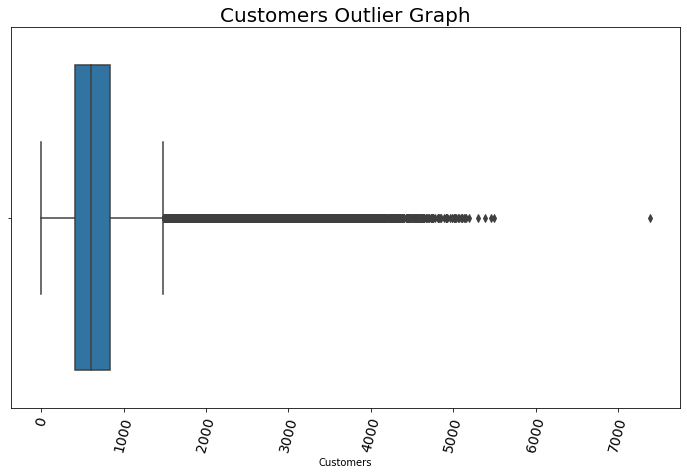

In [32]:

plot.plot_box(joined_train_df, joined_train_df['Sales'], "Sales Outlier Graph") 
plot.plot_box(joined_train_df, joined_train_df['Customers'], "Customers Outlier Graph")

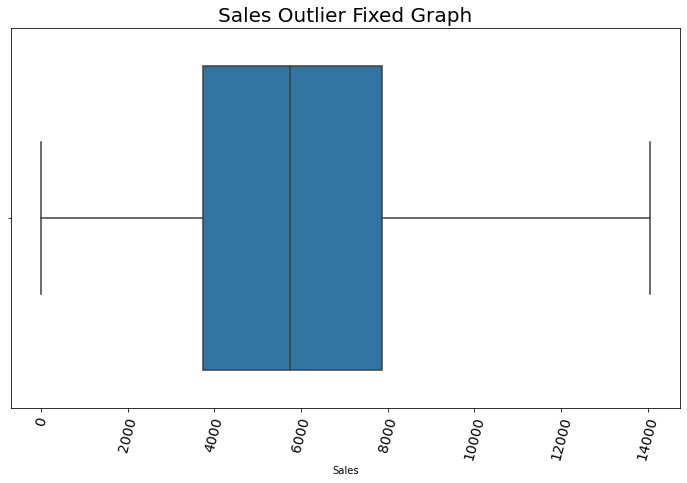

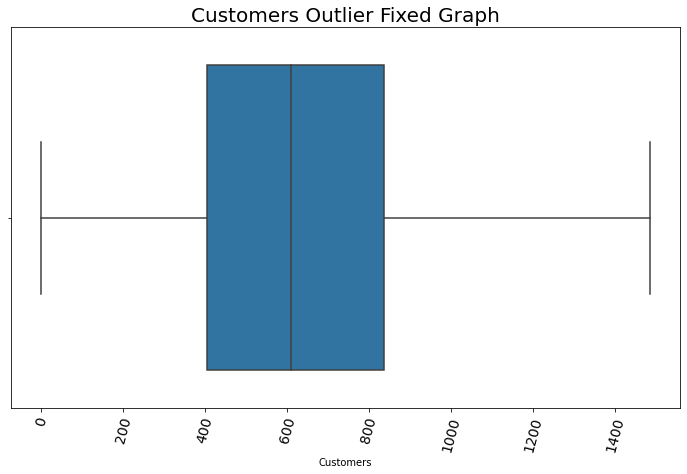

In [33]:
# remove outliers in the sales column
preprocess.replace_outliers_with_iqr(joined_train_df,['Sales', 'Customers'])
# display it in the graph
plot.plot_box(joined_train_df, joined_train_df['Sales'], "Sales Outlier Fixed Graph") 
plot.plot_box(joined_train_df, joined_train_df['Customers'], "Customers Outlier Fixed Graph")

In [ ]:
# Label Encoding
categorical_columns = ['PromoInterval', 'Assortment', 'StoreType']

label_encoded_columns = preprocess.label_encode(joined_train_df, categorical_columns)

In [ ]:
# merge the label encoded columns with our dataframe
joined_train_df.drop(categorical_columns, axis=1, inplace=True)
joined_train_df = pd.concat([joined_train_df, label_encoded_columns], axis=1)

In [ ]:
preprocess.get_info(joined_train_df)

In [ ]:
# write the joined train dataframe into a csv
preprocess.save_csv(joined_train_df,"../data/joined_train.csv")
joined_train_df.head()

In [ ]:
# write the joined test dataframe into a csv
preprocess.save_csv(joined_test_df,"../data/joined_test.csv")
joined_test_df.head()

In [ ]:
# read data from dvc
# df = preprocess.get_data_from_dvc('V2-train')

## Exploratory Data Analysis